In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pyodbc
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
pd.set_option('display.max_columns', None) # to view all the column details without truncation

In [3]:
# SWM Project connection string for SQL Server
connection_string = 'DRIVER={SQL Server};SERVER=192.168.0.100;DATABASE=MFB_LIVE;UID=sa;PWD=scs@123'
connection = pyodbc.connect(connection_string)

# SWM SQL query to select all records from the required table
query = "SELECT * FROM DP_MFB_BASE WHERE R_NO = 1"

# Execute the query and store the result in a DataFrame
df = pd.read_sql(query, connection)
df # Top 5 and bottom 5 rows and columns details

,NUM_1,UNID,UNIT_STATUS,ACTION_CODE,LATITUDE,LONGITUDE,STATION,TYCOD,SUB_TYCOD,PRIM_UNIT,ALARM_LEV,CD_TS_CLEAN_DISP,CD_TS_CLEAN,DS_TS_CLEAN,EN_TS_CLEAN,AR_TS_CLEAN,RANGE,R_NO,VEHICLE_TYPE,RESP_TIME_IN_MINS,ACKNOWLEDGE_TIME_IN_MINS,LEAVE_TIME_IN_MINS,TRAVEL_TIME_IN_MINS,INCI_COMBINED,HOUR_INCI_BIN,MNTH,YR,MNTH_NAME,MNTH_YR,DAY_OF_WEEK,CLEAN_DATE
0,F202301231,MP61,Dispatch,29,19.247632,72.862479,DAHISAR,RESCUE_SERVICE,BIRD_RESCUE,MP61,1,2023-01-20 13:55:53,2023-01-20 13:56:05,2023-01-20 13:56:05,2023-01-20 13:58:02,2023-01-20 14:03:59,REGION-4,1,MP,8.10,0.20,1.95,5.95,F202301231MP61,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
1,F202301242,BK23,Dispatch,29,18.934805,72.834626,FORT,RESCUE_SERVICE,BIRD_RESCUE,BK23,1,2023-01-20 16:42:34,2023-01-20 16:42:49,2023-01-20 16:42:49,2023-01-20 16:50:01,2023-01-20 17:02:17,REGION-1,1,BK,19.72,0.25,7.20,12.27,F202301242BK23,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
2,F202301364,MP39,Dispatch,29,19.230020,72.840612,BORIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP39,1,2023-01-22 07:58:19,2023-01-22 08:05:11,2023-01-22 08:05:11,2023-01-22 08:05:46,2023-01-22 08:16:01,REGION-4,1,MP,17.70,6.87,0.58,10.25,F202301364MP39,MORNING,1,2023,January,Jan_2023,Sunday,2023-01-22
3,F202300310,BK11,Dispatch,29,19.261711,72.851505,KANDARPADA,FIRE_CALL,FIRE_CALL,BK11,1,2023-01-08 13:45:10,2023-01-08 13:45:26,NaT,NaT,NaT,REGION-4,1,BK,0.00,0.00,0.00,0.00,F202300310BK11,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
4,F202300321,MP36,Dispatch,29,19.197250,72.871520,DINDOSHI,RESCUE_SERVICE,BIRD_RESCUE,MP36,1,2023-01-08 16:40:36,2023-01-08 16:40:48,NaT,NaT,NaT,REGION-4,1,MP,0.00,0.00,0.00,0.00,F202300321MP36,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,F202312679,MP43,Dispatch,29,19.070771,72.868015,BKC,FIRE_CALL,FIRE_CALL,MP43,1,2023-09-08 16:56:47,2023-09-08 16:57:44,2023-09-08 16:57:44,2023-09-08 17:00:23,2023-09-08 17:36:08,REGION-3,1,MP,39.35,0.95,2.65,35.75,F202312679MP43,AFTERNOON,9,2023,September,Sep_2023,Friday,2023-09-08
15984,F202312726,MP34,Dispatch,29,18.961477,72.812637,GAWALATANK,RESCUE_SERVICE,ANIMAL_RESCUE,MP34,1,2023-09-10 09:42:16,2023-09-10 09:43:39,2023-09-10 09:43:39,2023-09-10 10:20:56,2023-09-10 10:21:02,REGION-1,1,MP,38.77,1.38,37.28,0.10,F202312726MP34,MORNING,9,2023,September,Sep_2023,Sunday,2023-09-10
15985,F202312887,MP38,Dispatch,29,19.201187,72.858109,KANDIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP38,1,2023-09-16 17:45:32,2023-09-16 18:35:48,2023-09-16 18:35:48,2023-09-16 18:36:28,2023-09-16 19:43:49,REGION-4,1,MP,118.28,50.27,0.67,67.35,F202312887MP38,EVENING,9,2023,September,Sep_2023,Saturday,2023-09-16
15986,F202312981,MP59,Dispatch,29,18.957974,72.832664,MEMONWADA,HOUSE_COLLAPSE,HOUSE_COLLAPSE,MP59,1,2023-09-19 12:44:34,2023-09-19 12:45:08,2023-09-19 12:45:08,2023-09-19 12:48:52,2023-09-19 13:01:37,REGION-1,1,MP,17.05,0.57,3.73,12.75,F202312981MP59,AFTERNOON,9,2023,September,Sep_2023,Tuesday,2023-09-19


In [4]:
# Group by 'CLEAN_DATE' and count occurrences of 'NUM_1'
df_grouped = df.groupby('CLEAN_DATE', as_index=False)['NUM_1'].count()

# Rename the count column to 'NUM_1_Count'
df_grouped.rename(columns={'NUM_1': 'NUM_1_Count'}, inplace=True)

# Print or display the resulting DataFrame
df_grouped

,CLEAN_DATE,NUM_1_Count
0,2022-11-30,25
1,2022-12-01,29
2,2022-12-02,37
3,2022-12-03,42
4,2022-12-04,28
...,...,...
382,2023-12-17,27
383,2023-12-18,35
384,2023-12-19,30
385,2023-12-20,30


In [5]:
n=5
df_grouped.drop(df_grouped.head(n).index,inplace=True) # drop first n rows
df_grouped.drop(df_grouped.tail(n).index,inplace=True) # drop last n rows
df_grouped

,CLEAN_DATE,NUM_1_Count
5,2022-12-05,32
6,2022-12-06,35
7,2022-12-07,31
8,2022-12-08,23
9,2022-12-09,32
...,...,...
377,2023-12-12,23
378,2023-12-13,35
379,2023-12-14,38
380,2023-12-15,25


In [6]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF test for stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

adf_test(df_grouped['NUM_1_Count'])

ADF Statistic: -3.424271615561611
p-value: 0.010158762863284989
Critical Values:
	1%: -3.448196541708585
	5%: -2.869404683789669
	10%: -2.5709597356805545


In [7]:
# KPSS test for stationarity
def kpss_test(series):
    result = kpss(series)
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
        
kpss_test(df_grouped['NUM_1_Count'])

KPSS Statistic: 1.5826639143366856
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\adity\AppData\Local\Temp\ipykernel_18032\1004701601.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series)


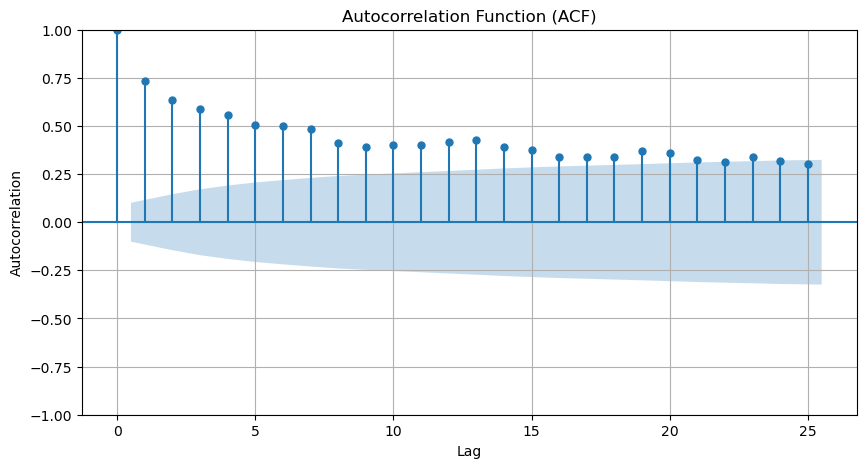

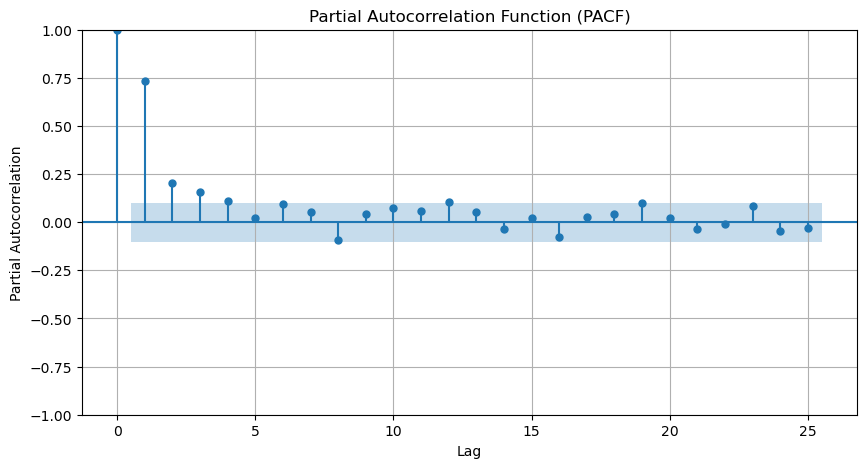

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
def plot_acf_graph(data, lags=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_acf(data, lags=lags, ax=ax)
    plt.title('Autocorrelation Function (ACF)')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

# Plot PACF
def plot_pacf_graph(data, lags=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_pacf(data, lags=lags, ax=ax)
    plt.title('Partial Autocorrelation Function (PACF)')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.grid(True)
    plt.show()

# Assuming 'value' is the column containing your time series data
plot_acf_graph(df_grouped['NUM_1_Count'], lags=25)
plot_pacf_graph(df_grouped['NUM_1_Count'], lags=25)

In [9]:
# Define the index to split the data
split_index = int(len(df_grouped) * 0.8)  # 80% for training, 20% for testing

# Split the DataFrame using iloc
train_df = df_grouped.iloc[:split_index]
test_df = df_grouped.iloc[split_index:]

# Optionally, you can reset the index of the new DataFrames if needed
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Separate the features (X) and target variable (y) if necessary
X_train = train_df.drop('NUM_1_Count', axis=1)
y_train = train_df['NUM_1_Count']
X_test = test_df.drop('NUM_1_Count', axis=1)
y_test = test_df['NUM_1_Count']

# Print the shapes of the train and test sets
print('Train set shape:', train_df.shape)
print('Test set shape:', test_df.shape)

Train set shape: (301, 2)
Test set shape: (76, 2)


# Auto ARIMA

In [10]:
from pmdarima import auto_arima

# Fit Auto ARIMA model
model = auto_arima(y_train, seasonal=True, m=12)  # Using m as 12 (seasonal period)

# Make predictions
n_forecast = len(y_test)
forecast = model.predict(n_periods=n_forecast)

In [11]:
forecast

301    30.863438
302    30.602551
303    30.411691
304    30.272062
305    30.169912
         ...    
372    29.891499
373    29.891499
374    29.891499
375    29.891499
376    29.891499
Length: 76, dtype: float64

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, forecast)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, forecast)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(y_test, forecast)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 7.426962486715867
MSE: 148.13595072614976
RMSE: 12.171111318451974
MAPE: 0.24941106044080188


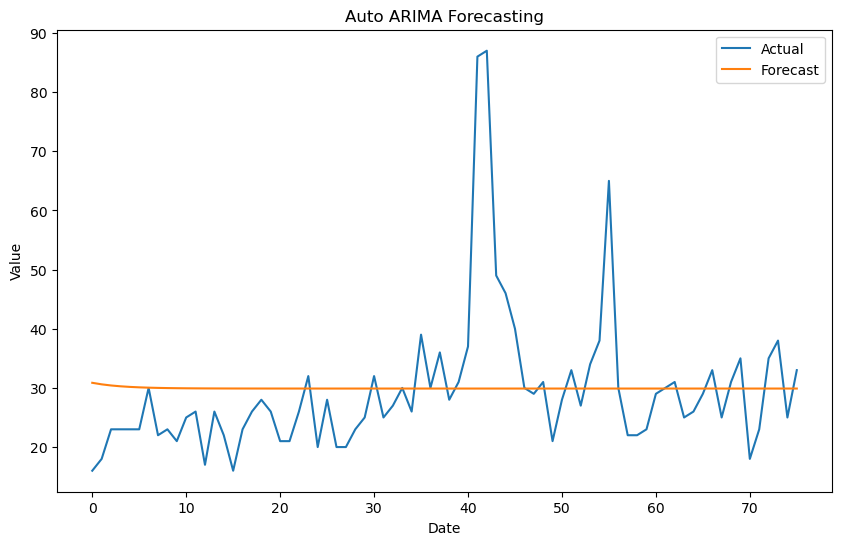

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.legend()
plt.show()

# Exponential Smoothing

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the parameters for Exponential Smoothing
seasonal_periods = 12  # Assuming monthly data with seasonal period of 12
trend = 'add'  # 'add' or 'mul' for additive or multiplicative trend
seasonal = 'add'  # 'add' or 'mul' for additive or multiplicative seasonal component

# Fit the Exponential Smoothing model
model = ExponentialSmoothing(y_train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
fitted_model = model.fit()

# Forecast future values using the fitted model
step_forecast = len(y_test)
forecast_values = fitted_model.forecast(steps=step_forecast)  # Using step_forecast as the number of predictions to be made

# Print the forecasted values
print("Forecasted values:")
print(forecast_values)

Forecasted values:
301    31.019512
302    30.199142
303    28.530293
304    27.098218
305    31.024327
         ...    
372    31.822193
373    31.167840
374    30.347469
375    28.678620
376    27.246545
Length: 76, dtype: float64


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, forecast_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, forecast_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate MAPE with the updated function and debug information
mape = mean_absolute_percentage_error(y_test, forecast_values)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}")

Mean Absolute Error (MAE): 7.906
Mean Squared Error (MSE): 150.907
Root Mean Squared Error (RMSE): 12.284
Mean Absolute Percentage Error (MAPE): 0.273


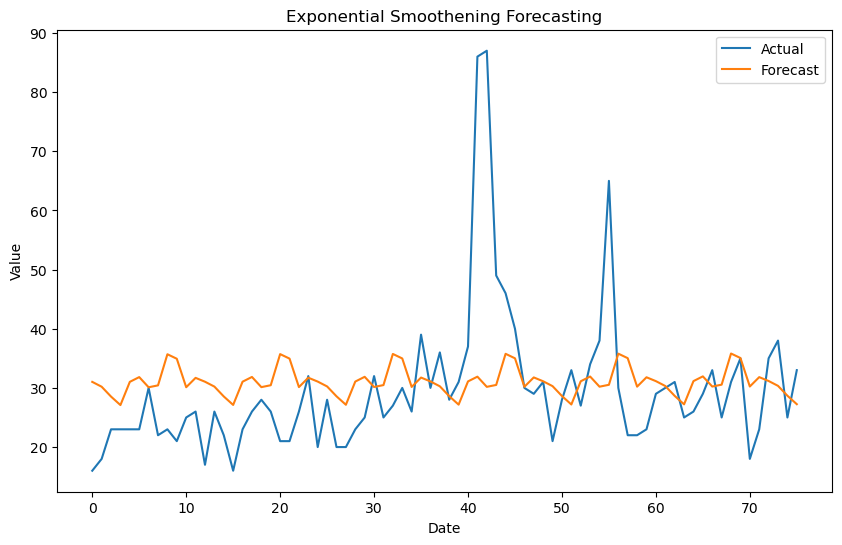

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast_values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Exponential Smoothening Forecasting')
plt.legend()
plt.show()

# Prophet

In [17]:
# Combine X_train and y_train into a single DataFrame
train_data = pd.DataFrame({'ds': X_train.squeeze(), 'y': y_train})

# Combine X_test and y_test into a single DataFrame
test_data = pd.DataFrame({'ds': X_test.squeeze(), 'y': y_test})

15:14:57 - cmdstanpy - INFO - Chain [1] start processing
15:14:58 - cmdstanpy - INFO - Chain [1] done processing


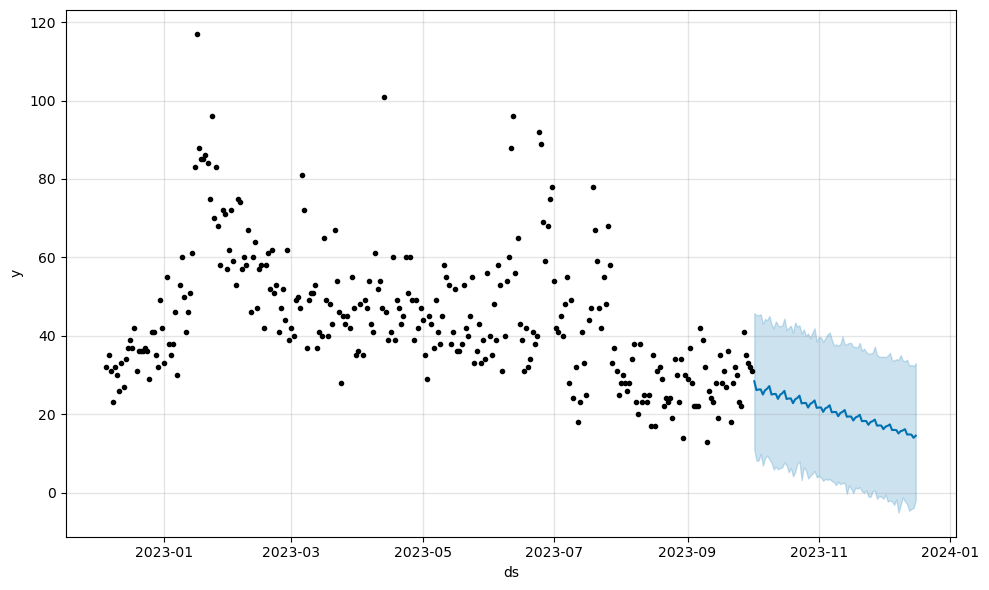

In [18]:
from prophet import Prophet

# Initialize Prophet model
model = Prophet(seasonality_mode='multiplicative')

# Fit the model to the train data
model.fit(train_data)

# Make predictions on the test data
forecast_prophet = model.predict(test_data)

# Plot the forecasted values
fig = model.plot(forecast_prophet)
plt.show()

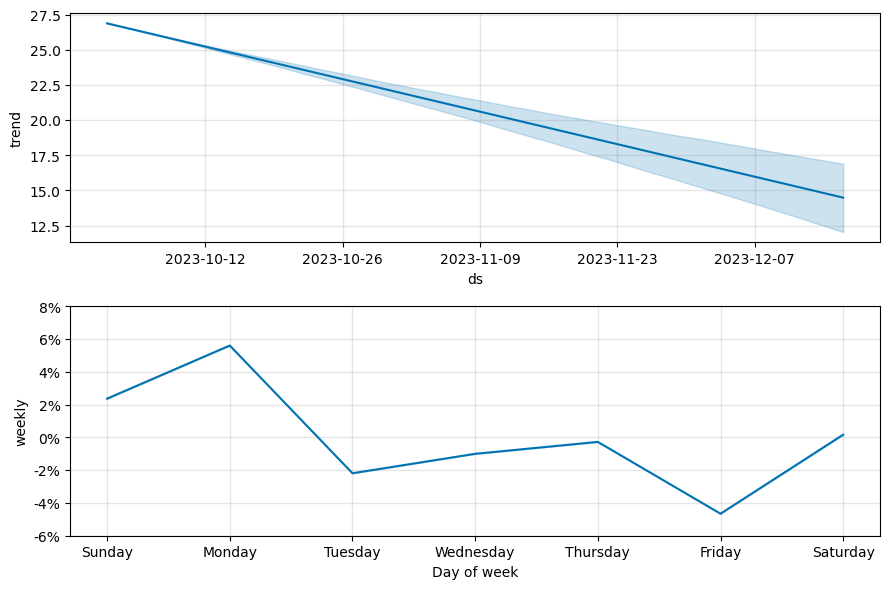

In [19]:
fig2 = model.plot_components(forecast_prophet)
plt.show()

In [20]:
forecast_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2023-10-02,26.880978,11.000063,45.766731,26.880978,26.880978,0.056017,0.056017,0.056017,0.056017,0.056017,0.056017,0.0,0.0,0.0,28.386769
1,2023-10-03,26.715684,8.127941,45.316589,26.715684,26.715684,-0.021890,-0.021890,-0.021890,-0.021890,-0.021890,-0.021890,0.0,0.0,0.0,26.130876
2,2023-10-04,26.550389,8.173845,45.205778,26.548122,26.553244,-0.010037,-0.010037,-0.010037,-0.010037,-0.010037,-0.010037,0.0,0.0,0.0,26.283906
3,2023-10-05,26.385094,9.860624,45.484965,26.377431,26.393660,-0.002773,-0.002773,-0.002773,-0.002773,-0.002773,-0.002773,0.0,0.0,0.0,26.311926
4,2023-10-06,26.219800,6.850475,43.066230,26.204453,26.237264,-0.046565,-0.046565,-0.046565,-0.046565,-0.046565,-0.046565,0.0,0.0,0.0,24.998862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023-12-12,15.145055,-2.965583,33.876518,12.940735,17.367963,-0.021890,-0.021890,-0.021890,-0.021890,-0.021890,-0.021890,0.0,0.0,0.0,14.813529
72,2023-12-13,14.979760,-4.654110,32.345990,12.705079,17.246216,-0.010037,-0.010037,-0.010037,-0.010037,-0.010037,-0.010037,0.0,0.0,0.0,14.829410
73,2023-12-14,14.814466,-4.158860,32.618278,12.500358,17.135767,-0.002773,-0.002773,-0.002773,-0.002773,-0.002773,-0.002773,0.0,0.0,0.0,14.773384
74,2023-12-15,14.649171,-3.951874,32.206344,12.257227,17.012998,-0.046565,-0.046565,-0.046565,-0.046565,-0.046565,-0.046565,0.0,0.0,0.0,13.967026


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate MAE
mae = mean_absolute_error(test_data['y'], forecast_prophet['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(test_data['y'], forecast_prophet['yhat'])
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast_prophet['yhat']))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(test_data['y'], forecast_prophet['yhat'])
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 10.91683923465574
Mean Squared Error (MSE): 260.93272875793895
Root Mean Squared Error (RMSE): 16.153412294556805
Mean Absolute Percentage Error (MAPE): 0.32039437781342045


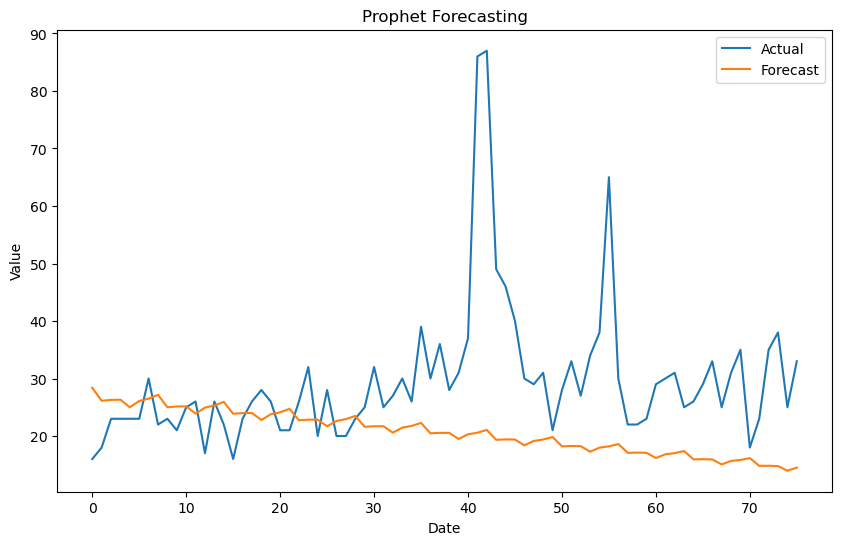

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['y'].index, test_data['y'], label='Actual')
plt.plot(test_data['y'].index, forecast_prophet['yhat'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Forecasting')
plt.legend()
plt.show()

# LSTM
Created in Google Colab since in Jupyter Notebook the Tensorflow version issues kept popping up even after the upgrade.